In [1]:
import numpy as np 
import sys 
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [2]:
df=pd.read_csv(r"D:\Users\111119109\Downloads\TATAPOWER.NS.CSV")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-11,78.300003,80.349998,78.099998,78.400002,67.076927,7365983
1,2018-06-12,79.000000,79.199997,77.699997,77.800003,66.563576,3505780
2,2018-06-13,78.199997,78.349998,76.800003,77.050003,65.921906,3049374
3,2018-06-14,77.199997,77.750000,76.349998,77.300003,66.135788,2956563
4,2018-06-15,77.400002,77.599998,75.900002,76.099998,65.109100,2703757
...,...,...,...,...,...,...,...
1230,2023-06-05,217.000000,219.399994,216.149994,219.050003,217.028778,8688870
1231,2023-06-06,219.800003,219.800003,215.550003,216.750000,214.750000,8301040
1232,2023-06-07,216.600006,219.649994,214.100006,218.449997,218.449997,11387499
1233,2023-06-08,218.949997,226.199997,218.449997,220.649994,220.649994,31056302


In [3]:
training_set=df.iloc[:1100,4:5].values
testing_set=df.iloc[1100:,4:5].values
print(training_set)
print(testing_set)
print(len(training_set),len(testing_set))

[[ 78.400002]
 [ 77.800003]
 [ 77.050003]
 [ 77.300003]
 [ 76.099998]
 [ 75.      ]
 [ 73.400002]
 [ 73.849998]
 [ 74.550003]
 [ 76.150002]
 [ 76.349998]
 [ 75.099998]
 [ 71.900002]
 [ 71.650002]
 [ 73.25    ]
 [ 72.25    ]
 [ 72.199997]
 [ 72.050003]
 [ 71.25    ]
 [ 71.75    ]
 [ 73.199997]
 [ 73.050003]
 [ 72.199997]
 [ 69.5     ]
 [ 70.150002]
 [ 68.949997]
 [ 70.900002]
 [ 70.      ]
 [ 68.199997]
 [ 67.849998]
 [ 68.050003]
 [ 67.800003]
 [ 67.800003]
 [ 70.849998]
 [ 71.849998]
 [ 73.849998]
 [ 74.550003]
 [ 73.050003]
 [ 71.949997]
 [ 72.349998]
 [ 71.849998]
 [ 70.300003]
 [ 69.449997]
 [ 69.900002]
 [ 69.349998]
 [ 68.75    ]
 [ 68.75    ]
 [ 67.150002]
 [ 68.650002]
 [ 70.050003]
 [ 72.25    ]
 [ 72.050003]
 [ 71.75    ]
 [ 75.599998]
 [ 74.849998]
 [ 76.900002]
 [ 76.099998]
 [ 76.699997]
 [ 78.199997]
 [ 73.349998]
 [ 74.900002]
 [ 75.050003]
 [ 75.199997]
 [ 73.800003]
 [ 74.449997]
 [ 74.      ]
 [ 76.199997]
 [ 77.900002]
 [ 74.599998]
 [ 75.550003]
 [ 72.900002]
 [ 69.

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler (feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.19466669],
       [0.19238098],
       [0.18952383],
       [0.19047621],
       [0.18590477],
       [0.1817143 ],
       [0.17561907],
       [0.17733334],
       [0.18000002],
       [0.18609526],
       [0.18685715],
       [0.18209524],
       [0.16990478],
       [0.1689524 ],
       [0.17504763],
       [0.17123811],
       [0.17104762],
       [0.17047621],
       [0.16742858],
       [0.16933334],
       [0.17485714],
       [0.17428574],
       [0.17104762],
       [0.16076192],
       [0.16323811],
       [0.15866667],
       [0.16609526],
       [0.16266668],
       [0.15580952],
       [0.15447619],
       [0.15523812],
       [0.15428574],
       [0.15428574],
       [0.16590477],
       [0.16971429],
       [0.17733334],
       [0.18000002],
       [0.17428574],
       [0.17009524],
       [0.17161905],
       [0.16971429],
       [0.16380955],
       [0.16057143],
       [0.16228573],
       [0.16019048],
       [0.15790477],
       [0.15790477],
       [0.151

In [5]:
#creating a datastructure with 60 timesteps and 1 output
lookback=60
X_train = []
y_train = []
for i in range(lookback, 1100):
    X_train.append(training_set_scaled[i-lookback:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1040, 60, 1)

In [6]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout 

In [7]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# regressor.add(Dropout(rate = 0.1))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 100, return_sequences = True))
# regressor.add(Dropout(rate = 0.1))

##add 3rd lstm layer
regressor.add(LSTM(units = 100, return_sequences = True))
# regressor.add(Dropout(rate = 0.1))

##add 4th lstm layer
regressor.add(LSTM(units = 100, return_sequences = False))
# regressor.add(Dropout(rate = 0.1))

##add output layer
regressor.add(Dense(units = 1))

In [8]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [9]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
regressor.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
65/65 [==============================] - 10s 79ms/step - loss: 0.0156
Epoch 2/100
65/65 [==============================] - 5s 79ms/step - loss: 0.0021
Epoch 3/100
65/65 [==============================] - 5s 80ms/step - loss: 0.0019
Epoch 4/100
65/65 [==============================] - 5s 77ms/step - loss: 0.0018
Epoch 5/100
65/65 [==============================] - 5s 77ms/step - loss: 0.0017
Epoch 6/100
65/65 [==============================] - 5s 77ms/step - loss: 0.0020
Epoch 7/100
65/65 [==============================] - 5s 78ms/step - loss: 0.0014
Epoch 8/100
65/65 [==============================] - 5s 77ms/step - loss: 0.0015
Epoch 9/100
65/65 [==============================] - 5s 76ms/step - loss: 0.0016
Epoch 10/100
65/65 [==============================] - 5s 75ms/step - loss: 0.0011
Epoch 11/100
65/65 [==============================] - 5s 76ms/step - loss: 0.0011
Epoch 12/100
65/65 [==============================] - 5s 75ms/step - loss: 9.4059e-04
Epoch 13/100
65/65 [

65/65 [==============================] - 5s 76ms/step - loss: 2.3554e-04
Epoch 97/100
65/65 [==============================] - 5s 76ms/step - loss: 2.7826e-04
Epoch 98/100
65/65 [==============================] - 5s 76ms/step - loss: 3.2022e-04
Epoch 99/100
65/65 [==============================] - 5s 76ms/step - loss: 3.7438e-04
Epoch 100/100
65/65 [==============================] - 5s 78ms/step - loss: 2.7483e-04


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:1100, 1:2]
dataset_test = df.iloc[1100:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
# print(inputs)
X_test = []
for i in range(60, 195):
    X_test.append(inputs[i-60:i, 0])
# print(X_test)
X_test=np.array(X_test)
print(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

In [12]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/5 [==============================] - 1s 38ms/step


In [13]:
predicted_stock_price.shape

(135, 1)

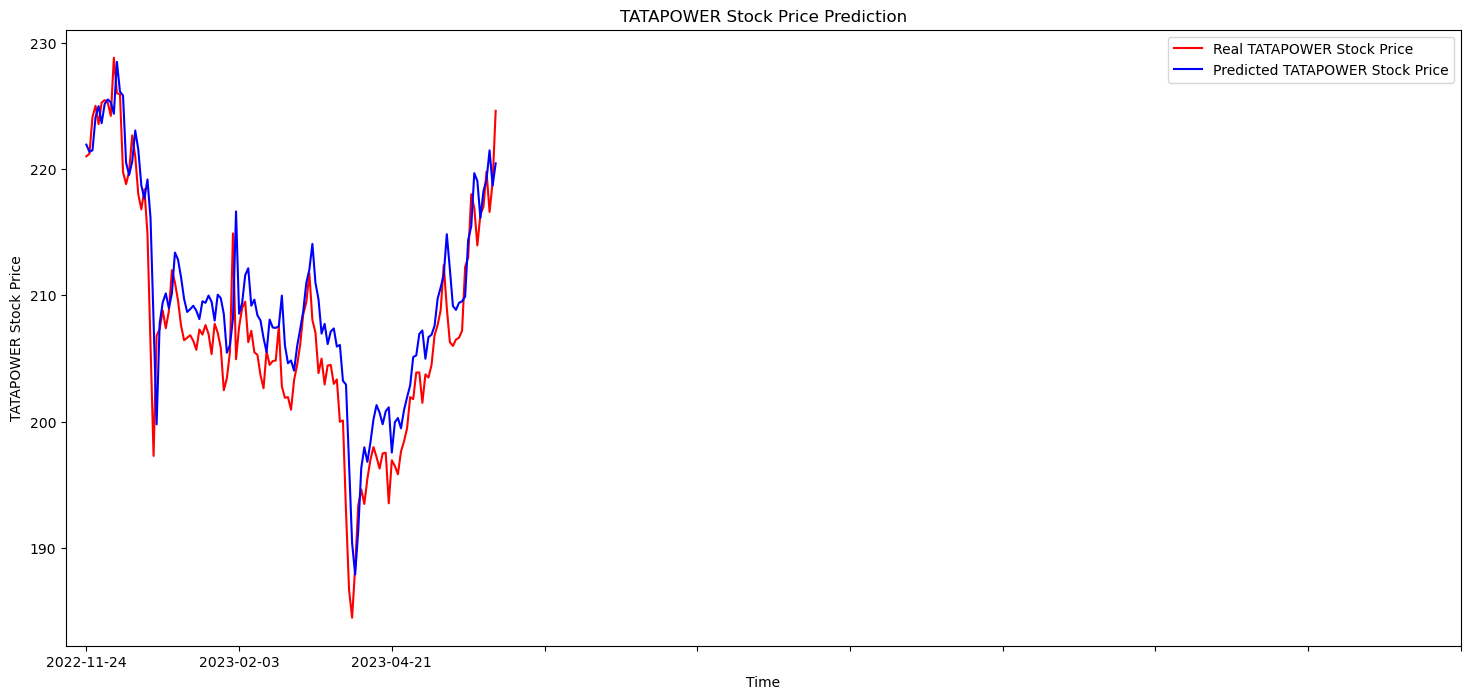

In [14]:
plt.figure(figsize=(18, 8))
plt.plot(df.loc[1100:, "Date"],dataset_test.values, color = "red", label = "Real TATAPOWER Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TATAPOWER Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TATAPOWER Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATAPOWER Stock Price')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(dataset_test.values, predicted_stock_price)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.8217206732742494


In [18]:
regressor.save("closing price")

INFO:tensorflow:Assets written to: closing price\assets


INFO:tensorflow:Assets written to: closing price\assets


In [19]:
from tensorflow.keras import models
model = models.load_model("closing price")

In [20]:
predicted_stock_price_model =model.predict(X_test)
predicted_stock_price_model = sc.inverse_transform(predicted_stock_price_model)

5/5 [==============================] - 1s 50ms/step


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(dataset_test.values, predicted_stock_price_model)
print('r2 score for perfect model is', r2)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(dataset_test.values, predicted_stock_price_model, squared=False)
print('rmse  for perfect model is', r2)

r2 score for perfect model is 0.8217206732742494
rmse  for perfect model is 0.8217206732742494


In [22]:
X_test

array([[[0.77600004],
        [0.76133335],
        [0.78742861],
        [0.79142862],
        [0.80438098],
        [0.79295241],
        [0.80133335],
        [0.83676193],
        [0.84666672],
        [0.83504766],
        [0.82438098],
        [0.82514287],
        [0.80057145],
        [0.81923816],
        [0.83657144],
        [0.80076194],
        [0.79123813],
        [0.79314289],
        [0.76876196],
        [0.77695242],
        [0.74476195],
        [0.72380957],
        [0.71504765],
        [0.71942858],
        [0.70438097],
        [0.72076194],
        [0.72190481],
        [0.7379048 ],
        [0.74038096],
        [0.73409527],
        [0.73561906],
        [0.72647622],
        [0.72628574],
        [0.73409527],
        [0.71504765],
        [0.73047624],
        [0.73942858],
        [0.72590482],
        [0.73885718],
        [0.7379048 ],
        [0.73066672],
        [0.74095243],
        [0.76076194],
        [0.76495244],
        [0.75885718],
        [0